In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We've import the libraries. This notebook uses various Python libraries to make prediction weather a flower is an iris or not based on its data. 

What we're going to cover:

0. Get the data ready
1. Do exploratory data analysis(EDA)
2. Preprocess the data with Sklearn
3. Choose the alogorirtm, make prediciton
4. Evaluate the model
5. Improve the model
6. Save the model

Since this is a beginner project. I will try my best. My goal is to reach prediction of 85%

# 0. Get the data ready

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df['class'] = iris.target

In [3]:
iris_df

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [5]:
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris_df.shape

(150, 5)

The iris datasets contain 5 rows which are: sepal_len, sepal_wid, petal_len, petal_wid, class.

In [7]:
iris_df.isna().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

# 1. EDA

We will try to answer these questions:

1. Does sepal lenngth affect the petal length?

In [8]:
iris_df.loc[0]

sepal_len    5.1
sepal_wid    3.5
petal_len    1.4
petal_wid    0.2
class        0.0
Name: 0, dtype: float64

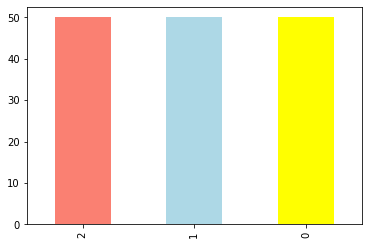

In [9]:
# Let's view the target column
iris_df['class'].value_counts().plot(kind='bar', color=['salmon','lightblue','yellow'])

In [10]:
iris_df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Does each class has certain attributes?

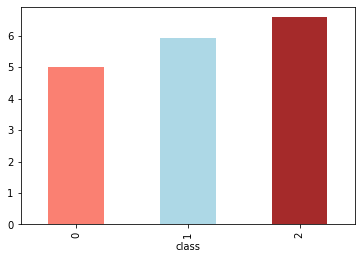

In [11]:
iris_df.groupby('class').sepal_len.mean().plot(kind='bar', color=['salmon','lightblue','brown']);

Class 2 has the highest mean of sepal_len. Following order is class 1 and 0.

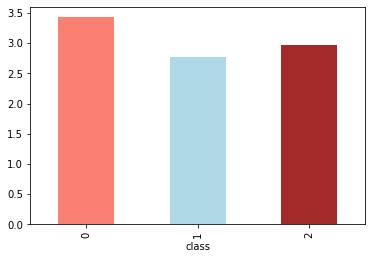

In [12]:
iris_df.groupby('class').sepal_wid.mean().plot(kind='bar',color=['salmon','lightblue','brown']);

Class 0 has the highest mean of sepal_wid. Following order is class 2 and 1.

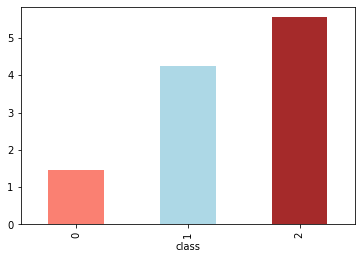

In [13]:
iris_df.groupby('class').petal_len.mean().plot(kind='bar',color=['salmon','lightblue','brown']);

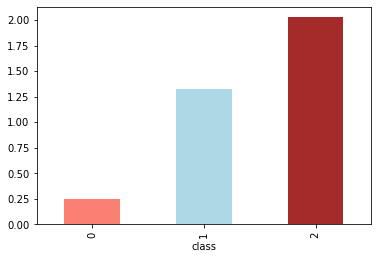

In [14]:
iris_df.groupby('class').petal_wid.mean().plot(kind='bar', color=['salmon','lightblue','brown'])

The sepal width of non iris seems bigger than others

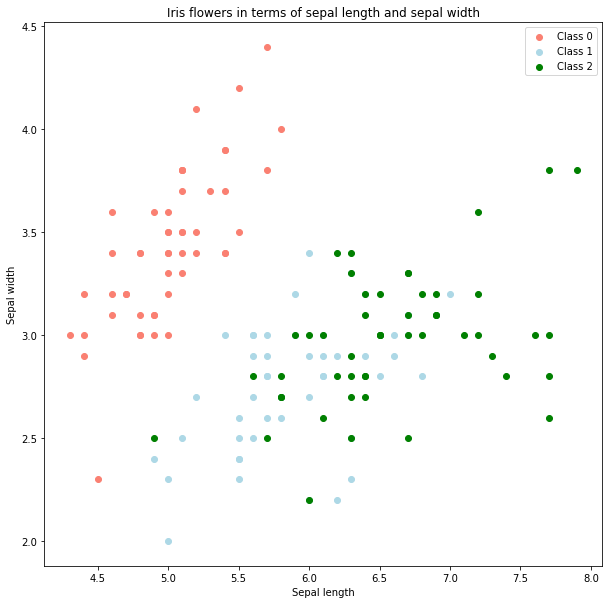

In [15]:
# sepal_wid vs sepal_len
plt.figure(figsize=((10,10)))
plt.scatter(iris_df.sepal_len[iris_df['class']==0],
           iris_df.sepal_wid[iris_df['class']==0], color='salmon')
plt.scatter(iris_df.sepal_len[iris_df['class']==1],
           iris_df.sepal_wid[iris_df['class']==1], color='lightblue')
plt.scatter(iris_df.sepal_len[iris_df['class']==2],
           iris_df.sepal_wid[iris_df['class']==2],color='green')
plt.title('Iris flowers in terms of sepal length and sepal width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Class 0', 'Class 1', 'Class 2']);

In [16]:
iris_df.corr()

,sepal_len,sepal_wid,petal_len,petal_wid,class
sepal_len,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_wid,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_len,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_wid,0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [17]:
import seaborn as sns

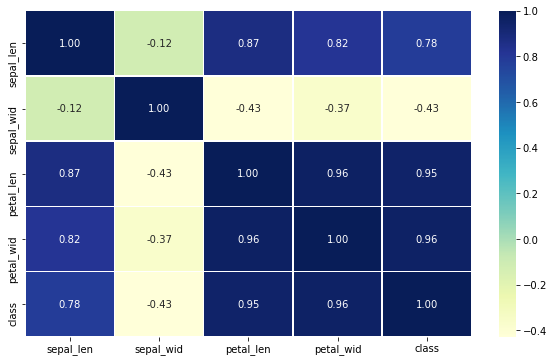

In [18]:
corr_matrix = iris_df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');

# 3. Modeling(we skip #2 for now)

In [19]:
# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model evaluation form sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [20]:
# Split into train and test data
X = iris_df.drop('class',axis=1)
y = iris_df['class']

In [21]:
X.shape, y.shape

((150, 4), (150,))

In [22]:
# Split into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [24]:
# Define model score function so we can test with multiple estimators
estimate_dict = {'Logistics Regression':LogisticRegression(),
                'KNeighborsClassifier':KNeighborsClassifier(),
                'Random forest classifier':RandomForestClassifier()}
def model_score(model_dict, X_train,X_test,y_train,y_test):
    '''
    Return scoring prediction from models in library
    '''
    new_dict ={}
    for name,model in model_dict.items():
        model.fit(X_train,y_train)
        new_dict[name] = model.score(X_test,y_test)
    return new_dict
scores = model_score(estimate_dict,X_train,X_test,y_train,y_test)

C:\Users\pc\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
score_df = pd.DataFrame(scores, index=['scoring'])
score_df

,Logistics Regression,KNeighborsClassifier,Random forest classifier
scoring,1.0,1.0,1.0


In [26]:
# Let's tune KNN
train_score=[]
test_score = []
neighbors=range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))  
    

In [27]:
train_score

[1.0,
 0.975,
 0.95,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.975,
 0.975,
 0.9666666666666667,
 0.9666666666666667,
 0.9583333333333334,
 0.975,
 0.9583333333333334,
 0.9666666666666667,
 0.9583333333333334,
 0.975,
 0.9666666666666667]

In [28]:
test_score

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667]

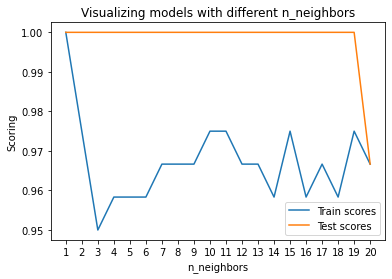

In [29]:
plt.plot(neighbors,train_score)
plt.plot(neighbors,test_score)
plt.title('Visualizing models with different n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Scoring')
plt.legend(['Train scores','Test scores'])
plt.xticks(np.arange(1,21,1));

# 4.Tuning

In [30]:
# Create a paramter grid for Randomforest Classifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

In [31]:
rf_log_grid = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions= rf_grid,
                               cv=5,
                               verbose=2,
                               n_iter=20)
rf_log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5, total=   0.4s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5, total=   0.3s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5, total=   0.3s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5, total=   0.4s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_depth=5, total=   0.3s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=5, max_depth=5 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=5, max_depth=5, total=   2.2s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=5, max_depth=5 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=5, max_depth=5, total=   2.3s
[CV] n_estimators=860, min_samples_split=6, min_samples_

[CV]  n_estimators=160, min_samples_split=18, min_samples_leaf=11, max_depth=None, total=   0.4s
[CV] n_estimators=160, min_samples_split=18, min_samples_leaf=11, max_depth=None 
[CV]  n_estimators=160, min_samples_split=18, min_samples_leaf=11, max_depth=None, total=   0.4s
[CV] n_estimators=160, min_samples_split=18, min_samples_leaf=11, max_depth=None 
[CV]  n_estimators=160, min_samples_split=18, min_samples_leaf=11, max_depth=None, total=   0.4s
[CV] n_estimators=160, min_samples_split=18, min_samples_leaf=11, max_depth=None 
[CV]  n_estimators=160, min_samples_split=18, min_samples_leaf=11, max_depth=None, total=   0.5s
[CV] n_estimators=160, min_samples_split=18, min_samples_leaf=11, max_depth=None 
[CV]  n_estimators=160, min_samples_split=18, min_samples_leaf=11, max_depth=None, total=   0.4s
[CV] n_estimators=160, min_samples_split=18, min_samples_leaf=5, max_depth=3 
[CV]  n_estimators=160, min_samples_split=18, min_samples_leaf=5, max_depth=3, total=   0.4s
[CV] n_estimator

[CV]  n_estimators=860, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   5.2s
[CV] n_estimators=860, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=860, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   2.5s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [32]:
rf_log_grid.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 13,
 'max_depth': 10}

In [33]:
rnn = RandomForestClassifier(n_estimators= 960, min_samples_split= 6,
 min_samples_leaf= 17,
 max_depth= 3)

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cv_precision = np.mean(cross_val_score(rnn,X,y,scoring='accuracy',cv=5))

In [40]:
cv_recall = np.mean(cross_val_score(rnn,X,y,scoring='f1_micro',cv=5))

In [43]:
pd.DataFrame([cv_precision, cv_recall],index=['Accuracy','F1 micro'])

,0
Accuracy,0.946667
F1 micro,0.946667


In [45]:
rnn.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=17, min_samples_split=6,
                       n_estimators=960)

In [47]:
y_preds=rnn.predict(X_test)

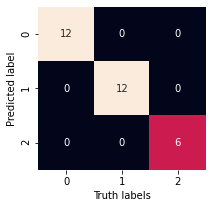

In [48]:
def plot_conf_mat(y_test, y_preds):
    '''
    This function plot confusion matrix with heatmap
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    cbar= False,
                    annot= True)
    plt.xlabel('Truth labels')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds)

In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

